<a href="https://colab.research.google.com/github/harnalashok/classification/blob/main/5_otto_tsne_umap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Lasr amended: 11th June, 2021
# My folder: C:\Users\ashok\OneDrive\Documents\t_sne_visualization
# github: classification/5_otto_tsne_umap.ipynb

# Objectives
#            i) Manifold Learning 
#               a) Understanding t-sne
#               b) Understanding umap
#           ii) Use transformed features in Modeling
#          iii) Using FeatureTransformer() in pipeline

# References:
# t-sne
# https://distill.pub/2016/misread-tsne/  ==> Very educative
# https://lvdmaaten.github.io/tsne/


# umap documentation:
# https://umap-learn.readthedocs.io/en/latest/parameters.html

# UMAP vs PCA vs t-sne
# https://slidetodoc.com/dimension-reduction-pca-t-sne-umap-v-2020/

# HTML code for Greek letters:
# https://sciencenotes.org/html-codes-for-greek-letters/


### Understanding Stochastic Neighbourhood embedding
The technique has become widespread in the field of machine learning, since it has an almost magical ability to create compelling two-dimensonal “maps” from data with hundreds or even thousands of dimensions. Although impressive, these images can be tempting to misread. Please also read this [blog](https://distill.pub/2016/misread-tsne/) as to possible pitfalls. In this [blog](https://distill.pub/2016/misread-tsne/) you can see live demo of 2D visualization changes as you change perplexity and epsilon.

#### Step 1: Fitting probability distribution in m-dimensional space

>	1. Start, in step-wise fashion with fitting a probability distribution over each one of the points of our data spread over in m-dimensional space.
>	2. The probbaility distribution fitted will be Gaussian (Normal) distribution.
>	3. So, start with some point, say, `i`, and fit a gaussian (normal) probability distribution over it with this point as center (`mean`, &mu;) and stddev = &sigma;<sub>i</sub>. But how to calculate &sigma;<sub>i</sub>? We will soon see. 
>	4. Once normal distribution is fitted over point `i`, calculate the probability that one would pick a point, `j` (or beyond), as its neighbour. Let this probability be p<sub>ij</sub>.
>	5. For fitting (1) above, we need to know the variance of probability distribution over `i`.
>	6. Calculate this variance manually by taking approx 30 to 50 points nearby. Nearby, here means nearness measured as per euclidean distance.
>	7. Since spread of points around `i` and around `j` will be different,so &sigma;<sub>i</sub> and &sigma;<sub>j</sub> may be different.
>	8. Therefore, p<sub>ij</sub> is not necessarily equal to p<sub>ji</sub> (that is the point `j` may not pick point `i` as its neighbour). So begin by
taking an average of the two.
>	9. Repeat steps (2) to (8) for all points and calculate pair-wise probabilities between all points. For many points, pairwise probabilites will be zero as the pair of points are very far away.
>	10.Consequently you will have a prob table something like below:

	         (for three points)

				  1	   2	 3
			1	 p11	p12	p13
			2	 p21	p22	p23
			3	 p31	p32	p33




Measuring distance of each point with others, in turn:

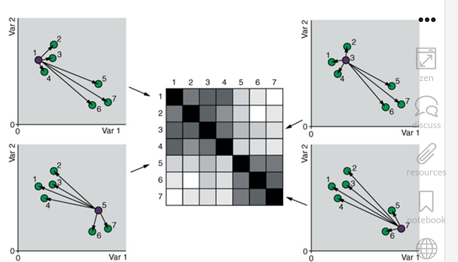

#### Step 2: We now fit above probability distribution in a 2D space

>	10. In the two dimensional space, we also use Gaussian prob distribution (of course shape of this distribution will be different). 
>	11. We start with plotting point, `i`, anywhere on x-y plane.
>	12. Then, around point, `i`, we construct a gaussian prob-distribution with this point as center (mean) and a 'constant' variance.
>	13. Next place point, `j`, (anywhere around `i`) at a point on x-y plane such that its probability is p<sub>ij</sub> (that is as in above prob table).

> 14. Now a third point `k` is to be plotted as a neighbor of point `i`. Let among themselves, `i, j, k` have the following probabilities:

>> p<sub>ij</sub> = 0.5<br>
>> p<sub>ik</sub> = 0.02<br>
>> p<sub>jk</sub> = 0.3<br>

>  One way to plot these three points in a 2D plane would be, as follows (0 => indicates point location):

		
			0(=i)   0(=j)

				   0(k)
	   
>  Why? Because point 'j' should be near to point 'i' (p<sub>ij</sub> is high); point `k` should be far from point `i` (p<sub>ik</sub> low) but point `k`
should be near to point `j` (p<sub>jk</sub> high). There can, thus, be many ways to plot points `i, j and k` in 2D keeping probabilities (almost)
same. Hence, if there are many independent processes making the plots, each set of points may project and draw different shapes.

> Also, when mapping these probabilites to two dimensional space, it is possible that when we adjust points, we have to adjust some probabilites and in this mutual adjusting process p<sub>ij</sub>  becomes 0.4, p<sub>ik</sub> becomes 0.01 and p<sub>jk</sub> = 0.25 because other points are also to be plotted. So the probaility distribution around point, `i`, will be somewhat different in the 2D space than the probability distribution around point, `i` in the original m-dimensaional space. Here comes the role of [Kullback–Leibler](https://en.wikipedia.org/wiki/Kullback%E2%80%93Leibler_divergence) divergence. See [this](https://en.wikipedia.org/wiki/Kullback%E2%80%93Leibler_divergence) simple example to see of how KL divergence is calculated.



#### t-sne video
Here is a very easy to understand video of t-sne

In [ ]:
from IPython.display import HTML

# Youtube
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/NEaUSP4YerM?rel=0&amp;controls=0&amp;showinfo=0" frameborder="0" allowfullscreen></iframe>')


#### Another video
This is an explanation from the author of t-sne itself. Please see this video from beginning upto point 18:00 at the least and then as much as you understand.

In [ ]:
from IPython.display import HTML
# Youtube
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/UUtXKDgv1AVoG88PLl8nGXmw?rel=0&amp;controls=0&amp;showinfo=0" frameborder="0" allowfullscreen></iframe>')


#### t-distribution vs normal distribution

The t distribution looks a bit like a normal distribution, except that it’s not quite as tall in the middle, and its tails are flatter and extend further out (see figure below). It’s a bit like if someone sat on a normal distribution and squashed it. This is where the “t” in t-SNE comes from. 

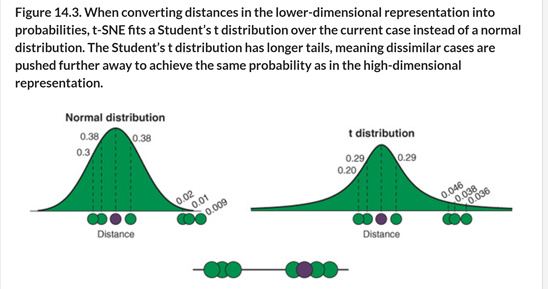

#### About UMAP
UMAP (Uniform Manifold Approximation and Projection (UMAP) dimesionality reduction is based on graph theory and is rather difficult to explain. However, if you still like to see one basic video on it, then it is here.  
Like t-sne UMAP can be used for visualizaing N-dimensional data. It can also be used to reduce dimensionality of data for use in normal ML modeling.

#### Two benefits of UMAP

> One benefit (and the main benefit) is that UMAP is a deterministic algorithm. In other words, given the same input, it will always give the same output. This means that, unlike with t-SNE, we can project new data onto the lower-dimensional representation, allowing us to incorporate UMAP into our machine learning pipelines.

> The second benefit is that UMAP preserves both local and global structure. Practically, this means that not only can we interpret two cases close to each other in lower dimensions as being similar to each other in high dimensions, but we can also interpret two clusters of cases close to each other as being more similar to each other in high dimensions.

In [ ]:
from IPython.display import HTML
# Youtube
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/6BPl81wGGP8?rel=0&amp;controls=0&amp;showinfo=0" frameborder="0" allowfullscreen></iframe>')


### Install umap and call libraries
Install umap on Colab as follows. On colab, it is also easy to install umap's plotting function.  
On laptop use conda instruction below to install umap.

#### Install umap

In [ ]:
# 0.0
# Install umap
# umap github page:
# https://github.com/lmcinnes/umap
# conda install -c conda-forge umap-learn

# 0.1
!pip install umap

# 0.2 Following is NOT available as conda package
!pip install umap-learn[plot]

#### Call libraries

In [ ]:
# 1.0 Clear memory
#%reset -f

## A. Data manipulation

# 1.1 Call data manipulation libraries
import pandas as pd
import numpy as np


## D. Data preprocessing
# 1.4.1 Scaling data in various manner
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedShuffleSplit

from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import FunctionTransformer

from sklearn.pipeline import make_pipeline
## Manifolds
from sklearn.manifold import TSNE
from umap import UMAP
import umap.plot

from sklearn.ensemble import  RandomForestClassifier
from sklearn.metrics import log_loss
## G: Others
# 1.10 Misc/visualization
import os, time, gc
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# 1.11 Display multiple commands output from a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#### Test umap

Quick check if umap is installed
on your laptop. Copy the following
code. Paste and execute.
```
import pandas as pd
from umap import UMAP
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
import seaborn as sns
digits = load_digits()
embedding = UMAP().fit_transform(digits.data)
embedding.shape  # (1792,2)
df = pd.DataFrame(embedding, columns = ['x', 'y'])
sns.scatterplot(data = df, x = 'x', y = 'y')
sns.scatterplot(data = df, x = 'x', y = 'y', c = digits.target)
```

## Manifold learning on otto dataset

### Read data

In [20]:
# 2.0 Mount gdrive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [21]:
# 2.1 Set datafile path
path = "/content/"
path = "/content/drive/MyDrive/Colab_data_files/otto/"
os.chdir(path)
# 2.1.0 Read train file
train = pd.read_csv("train.csv.zip")

In [ ]:
# 2.2 Look at data
train.shape                        # 61878 X 95
print()
train.head(2)
print()
train.dtypes.value_counts()        # All features are integers except target

(61878, 95)

,id,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,feat_11,feat_12,feat_13,feat_14,feat_15,feat_16,feat_17,feat_18,feat_19,feat_20,feat_21,feat_22,feat_23,feat_24,feat_25,feat_26,feat_27,feat_28,feat_29,feat_30,feat_31,feat_32,feat_33,feat_34,feat_35,feat_36,feat_37,feat_38,feat_39,...,feat_55,feat_56,feat_57,feat_58,feat_59,feat_60,feat_61,feat_62,feat_63,feat_64,feat_65,feat_66,feat_67,feat_68,feat_69,feat_70,feat_71,feat_72,feat_73,feat_74,feat_75,feat_76,feat_77,feat_78,feat_79,feat_80,feat_81,feat_82,feat_83,feat_84,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93,target
0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,2,0,0,0,0,1,0,4,1,1,0,0,2,0,0,0,0,0,1,0,0,0,0,...,0,0,2,0,0,11,0,1,1,0,1,0,7,0,0,0,1,0,0,0,0,0,0,0,2,1,0,0,0,0,1,0,0,0,0,0,0,0,0,Class_1
1,2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,2,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Class_1


int64     94
object     1
dtype: int64

In [ ]:
# 2.3 Target classes--absolute vs normalized
train.target.value_counts()
print("\n\n--normalized--\n")
train.target.value_counts(normalize=True)

Class_2    16122
Class_6    14135
Class_8     8464
Class_3     8004
Class_9     4955
Class_7     2839
Class_5     2739
Class_4     2691
Class_1     1929
Name: target, dtype: int64



--normalized--



Class_2    0.260545
Class_6    0.228433
Class_8    0.136785
Class_3    0.129351
Class_9    0.080077
Class_7    0.045881
Class_5    0.044265
Class_4    0.043489
Class_1    0.031174
Name: target, dtype: float64

In [ ]:
# 2.4  Check if there are Missing/duplicate values? None
train.isnull().sum()            # None
train.isnull().sum().sum()      # None
train.duplicated().sum()        # None

id         0
feat_1     0
feat_2     0
feat_3     0
feat_4     0
          ..
feat_90    0
feat_91    0
feat_92    0
feat_93    0
target     0
Length: 95, dtype: int64

0

0

In [ ]:
# 2.5 Drop 'id' and save target column in another variable
train.drop(columns = ['id'] , inplace = True)
y = train.pop('target')   # Target

In [ ]:
# 2.6 Data is very skewed
train.describe()

,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,feat_11,feat_12,feat_13,feat_14,feat_15,feat_16,feat_17,feat_18,feat_19,feat_20,feat_21,feat_22,feat_23,feat_24,feat_25,feat_26,feat_27,feat_28,feat_29,feat_30,feat_31,feat_32,feat_33,feat_34,feat_35,feat_36,feat_37,feat_38,feat_39,feat_40,...,feat_54,feat_55,feat_56,feat_57,feat_58,feat_59,feat_60,feat_61,feat_62,feat_63,feat_64,feat_65,feat_66,feat_67,feat_68,feat_69,feat_70,feat_71,feat_72,feat_73,feat_74,feat_75,feat_76,feat_77,feat_78,feat_79,feat_80,feat_81,feat_82,feat_83,feat_84,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93
count,61878.00000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,...,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000
mean,0.38668,0.263066,0.901467,0.779081,0.071043,0.025696,0.193704,0.662433,1.011296,0.263906,1.252869,0.140874,0.480979,1.696693,1.284398,1.413459,0.366108,0.575423,0.551699,0.471525,0.204014,0.729969,0.142522,2.643880,1.534520,0.563108,0.696613,0.238970,0.275768,0.150312,0.148680,1.043796,0.696516,0.946411,0.666263,0.709089,0.263632,0.582129,0.485585,1.653059,...,2.072465,0.323120,0.303775,0.309108,0.697970,0.388603,1.029930,0.239746,1.187563,0.168590,1.256796,0.222228,0.571706,2.897653,0.392902,0.811128,0.892789,0.319290,0.858722,0.591050,0.579851,0.726817,0.748457,0.124196,0.366415,0.300446,0.698067,0.078461,0.187983,0.496719,0.070752,0.532306,1.128576,0.393549,0.874915,0.457772,0.812421,0.264941,0.380119,0.126135
std,1.52533,1.252073,2.934818,2.788005,0.438902,0.215333,1.030102,2.255770,3.474822,1.083340,3.042333,0.567089,2.014697,3.163212,3.862236,2.226163,1.477436,1.335985,4.636145,1.438727,0.696050,1.446220,0.782979,4.629015,2.332994,1.710305,2.873222,0.828112,1.901294,1.640880,0.897354,2.416849,1.310202,3.368622,3.197965,2.555119,0.756934,1.602579,3.298315,3.299798,...,4.113319,0.998743,1.925806,1.082148,3.983722,2.577693,3.028469,1.017553,2.666742,0.946158,3.402080,0.783052,1.361874,4.974322,1.761054,4.111091,1.941368,1.162443,2.411646,5.783233,3.757822,3.200095,2.920038,0.906621,2.778317,1.285569,2.245671,0.461244,0.836269,2.434921,1.151460,1.900438,2.681554,1.575455,2.115466,1.527385,4.597804,2.045646,0.982385,1.201720
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00

In [ ]:
# 3.0 Reduce Memory usage
print("--Current memory usage (MB) --\n")
train.memory_usage().sum()/1000000  # 46.03736MB

# 3.1
print("\n\n--Max and min values---\n")
train.max().max()               # 352
print()
train.min().min()               # 0

# 3.2 Change dtype
train = train.astype('uint16')

# 3.3
print("\n\n--Revised memory usage (MB) --\n")
train.memory_usage().sum()/1000000  # 11.509436 MB

--Current memory usage (MB) --



46.03736



--Max and min values---



352

0



--Revised memory usage (MB) --



11.509436

In [ ]:
# 3.4 Encode labels. We have 9 target levels
le = LabelEncoder()
y = le.fit_transform(y)

### Perform t-sne dimesionality reduction now

t-SNE has four important hyperparameters that can drastically change the resulting embedding:

> *perplexity—* Controls the width of the distributions used to convert distances into probabilities. High values place more focus on global structure, whereas small values place more focus on local structure. Typical values lie in the range 5 to 50. The default value is 30. <br>
> *theta*— Controls the trade-off between speed and accuracy. Because t-SNE is slow, people commonly use an implementation called Barnes-Hut t-SNE, which allows us to perform the embedding much faster but with some loss of accuracy. The theta hyperparameter controls this trade-off, with 0 being “exact” t-SNE and 1 being the fastest but least accurate t-SNE. The default value is 0.5. <br>
> *eta*— How far each data point moves at each iteration (also called the learning rate). Lower values need more iterations to reach convergence but may result in a more accurate embedding. The default value is 200, and this is usually fine.<br>
> *max_iter*— The maximum iterations allowed before computation stops. This will depend on your computational budget, but it’s important to have enough iterations to reach convergence. The default value is 1,000.

In [ ]:
# 4.0 Standardize dataset
ss = StandardScaler()
X = ss.fit_transform(train)

The following code creates an object of type `StratifiedShuffleSplit`. One of the methods of this object, `split()` , creates a generator. The question is why 'generator' why not 'iterator'?

An iterator is generally expected to output a sequence. But in this case we are not outputting any sequence. We are outputting a pair of `random` indices. Number of pairs is `n_splits`. The generator will break its loop and will stop outputting any further pairs once `n_splits` limit has been reached. And, of course, every generator behaves as an iterator.

In [ ]:
# 4.1 As t-sne on full dataset may take a longtime,
#     we intend to take a sample of it. But sampling
#     must be stratified. So, for the purpose of taking a 
#     stratified sample, we use StratifiedShuffleSplit
#     Note that we are NOT interested in the test data.
#     NOTE: In the code below, increase test_size  
#           to have a smaller 'train' dataset.

sss =  StratifiedShuffleSplit(
                              n_splits = 1,     # Need only 1-pair of splits
                              test_size = 30000
                              )

# 4.1.1 'sss' object when used with split() method
#       is a generator that will generate splits
#        as you need them. Check its type:

type(sss)             # StratifiedShuffleSplit
print()
type(sss.split(X,y))  # Generator

# 4.1.2 Now get indicies of our data points: 
for train_index, test_index in sss.split(X, y):
    X_train = X[train_index,:]
    y_train = y[train_index]

sklearn.model_selection._split.StratifiedShuffleSplit

generator

In [ ]:
# 4.1 Use PCA to remove noise
#     as also to slightly reduce data dimensions

pca = PCA(n_components=0.95)   # Explain 95% variance
Xf = pca.fit_transform(X_train)
Xf.shape

(31878, 77)

In [ ]:
# 4.3 Perform t-sne now.
#     Takes time

start = time.time()
# 4.3.1 Instantiate TSNE class
tsne = TSNE(
            perplexity = 30,  # Larger datasets usually require a larger perplexity.
                              # Experiment with selecting a value between 5 and 50.
            n_jobs = 2,
            )

# 4.3.2 Fit and transform dataset to 2D

res = tsne.fit_transform(Xf)
end = time.time()
(end - start)/60   # 10 min

9.719796454906463

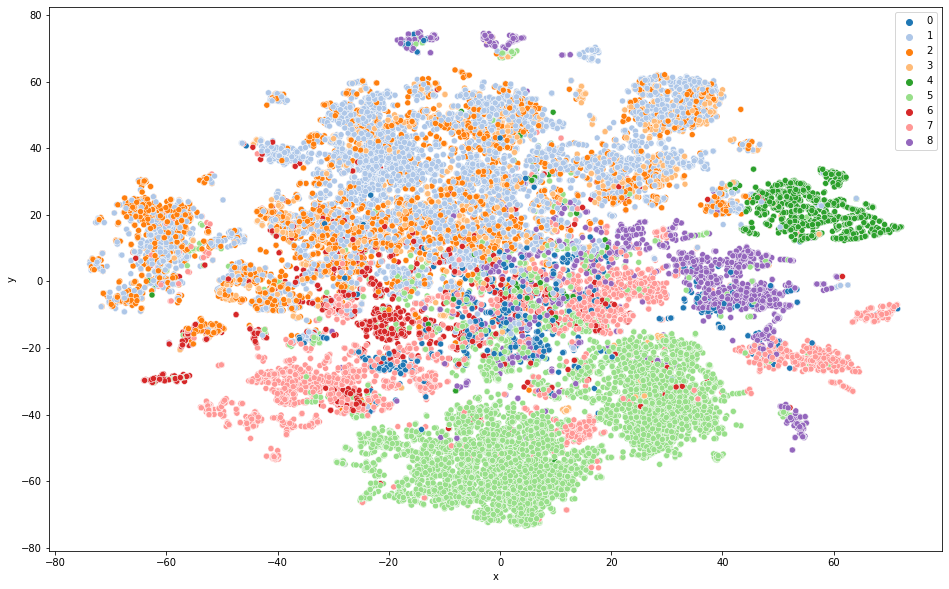

In [ ]:
# 4.4 Plot the results now
# As number of classes are nine, we must select a proper
# pallete to distinguish properly between colors
# Colormaps: https://matplotlib.org/stable/tutorials/colors/colormaps.html

res = pd.DataFrame(res, columns= ['x','y'])
fig = plt.figure(figsize = (16,10))
_=sns.scatterplot(data=res, x='x', y='y', hue=y_train, palette='tab20')

### Perform UMAP now
Uniform Manifold Approximation and Projection (UMAP)

Just like t-SNE, UMAP has four important hyperparameters that control the resulting embedding:

> *n_neighbors*— Controls the radius of the fuzzy search region. Larger values will include more neighboring cases, forcing the algorithm to focus on more global structure. Smaller values will include fewer neighbors, forcing the algorithm to focus on more local structure.<br>

> *min_dist*— Defines the minimum distance apart that cases are allowed to be in the lower-dimensional representation. Low values result in “clumpy” embeddings, whereas larger values result in cases being spread further apart.<br>

> *metric*— Defines which distance metric UMAP will use to measure distances along the manifold. By default, UMAP uses ordinary Euclidean distance, but other (sometimes crazy) distance metrics can be used instead. A common alternative to Euclidean distance is Manhattan distance (also called taxi cab distance): instead of measuring the distance between two points as a single (possibly diagonal) distance, it measures the distance between two points one variable at a time and adds up these little journeys, just like a taxi cab driving around blocks in a city. We can also apply t-SNE with distance metrics other than Euclidean, but we first need to manually calculate these distances ourselves. The UMAP implementation just lets us specify the distance we want, and it takes care of the rest.<br>

> *n_epochs*— Defines the number of iterations of the optimization step.

In [ ]:
# 5.0 We will perform umap on the 
#     whole of dataset. On colab
#      it takes 3 minutes

start = time.time()
mapper = umap.UMAP().fit(X)       # Instantiation and fitting
embedding =  mapper.transform(X)  # Data transformation
end = time.time()
(end-start)/60   # 3 minutes

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


1.7663320263226827

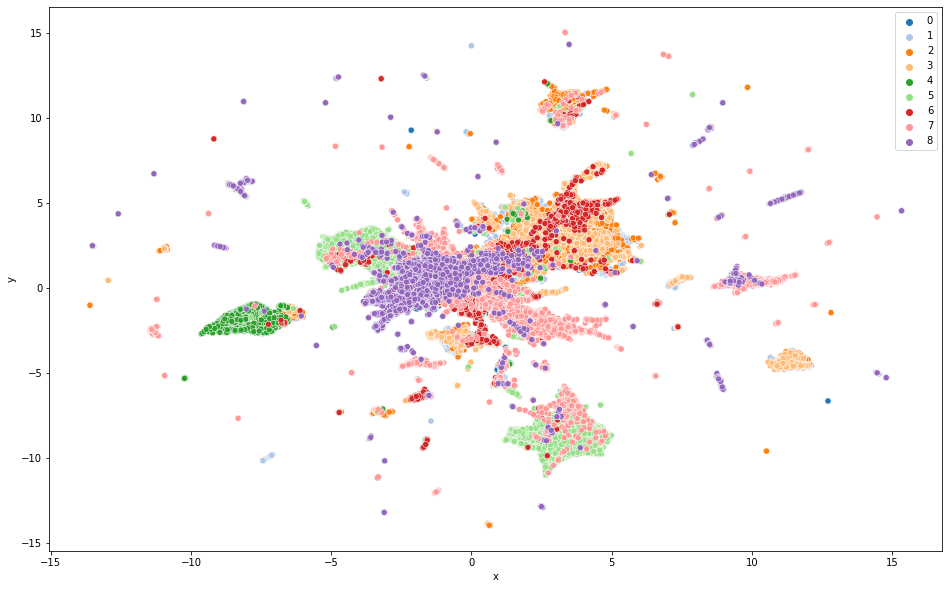

In [ ]:
# 5.1 Plot the UMAP result now
#     As number of classes are nine, we must select a proper
#     pallete to distinguish properly between colors

# Colormaps: https://matplotlib.org/stable/tutorials/colors/colormaps.html

embedding = pd.DataFrame(embedding, columns= ['x','y'])
fig = plt.figure(figsize = (16,10))
_=sns.scatterplot(
                   data=embedding,
                   x='x',
                   y='y',
                   hue=y,          # Else use y_train
                   palette='tab20')

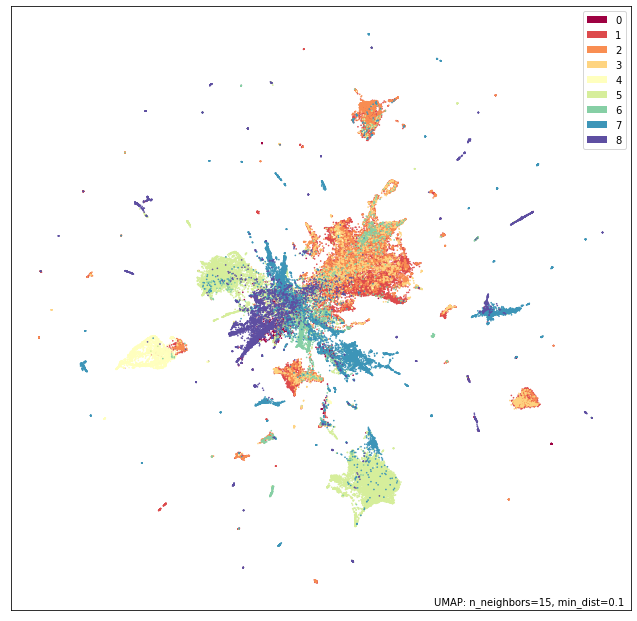

In [ ]:
# 5.2 Another way to plot is to use umap's plotting utility
#     Available on Google Colab but NOT on your laptop

_=umap.plot.points(
                    mapper,
                    labels=y
                   )

#### The strengths of t-SNE and UMAP are as follows:

They can learn nonlinear patterns in the data.
They tend to separate clusters of cases better than PCA.<br>
> UMAP can make predictions on new data.<br>
> UMAP is computationally inexpensive.<br>
> UMAP preserves both local and global distances.<br>

#### The weaknesses of t-SNE and UMAP are these:

> The new axes of t-SNE and UMAP are not directly interpretable in terms of the original variables.

> t-SNE cannot make predictions on new data (different result each time).

> t-SNE is computationally expensive.

> t-SNE doesn’t necessarily preserve global structure.

> They cannot handle categorical variables natively.

## Umap in predictive analytics  
A Template  
UMAP transformed output could be used as features in modeling. But it may be still better if features generated by UMAP are horizontally stacked with existing features. Consider the following pipes as a template for future use. Please feel free to add data transformers of your choice.

In [ ]:
# 6.0 Split data in stratified manner
# Perform stratified sampling

# 6.0.1
sss =  StratifiedShuffleSplit(n_splits = 1, test_size = 0.3)
# 6.0.2
for train_index, test_index in sss.split(train, y):
    X_train, X_test = train.loc[train_index,:],train.loc[test_index, :] 
    y_train, y_test = y[train_index], y[test_index]

##### pipe1

In [ ]:
# 6.1 Create pipeline, feed data and execute it
#     Note UMAP is a part of pipe()

start = time.time()
# 6.1.1
pipe1 = make_pipeline(
                     StandardScaler(),
                     PCA(n_components=0.95), 
                     UMAP(
                           n_neighbors=15,  # Something akin to perplexity
                           n_components = 5 # 5D output
                          ),
                      
                     RandomForestClassifier(max_depth =35)
                     )

# 6.1.2
pipe1.fit(X_train,y_train)
# 6.1.3
y_pred = pipe1.predict_proba(X_test)
# 6.1.4
log_loss(y_test,y_pred)
end = time.time()
(end-start)/60

#### Another pipe
pipe2: Concatenate umap's feature with original data. Note here the use of `FunctionTransformer()`

In [ ]:
# 7.0 Define a function to concatenate
#     umap generated features with original data
#     This function can not take any other argument,
#     for example, n_neighbors or n_components, that
#     pipe will not pass into it.

def gen_features(data):     # Other arguments not possible
  # 7.1
  out = UMAP(n_neighbors=15, n_components = 2).fit_transform(data)
  # 7.2
  return np.hstack([data,out])

In [ ]:
# 8.0 Define pipe.
#     The above function defined above
#     is wrapped with FunctionTransformer
#     to use as a part of pipe. Note that
#     function-transformer, passes into
#     gen_features(), the data output
#     of earlier operation from PCA.

start = time.time()
# 8.1
pipe1 = make_pipeline(
                     StandardScaler(),
                     PCA(n_components=0.95), 
                     FunctionTransformer(gen_features),
                     RandomForestClassifier(max_depth=35,n_jobs=2,n_estimators=300)
                     )

# 8.2
pipe1.fit(X_train,y_train)
# 8.3
y_pred = pipe1.predict_proba(X_test)
# 8.4
print()
# 8.5
log_loss(y_test,y_pred)
end = time.time()
print()
(end -start)/60    # 4 minutes on Colab


In [ ]:
########## I am done #################

## Exercises:

#### Exercise1:

In the [Kannada MNIST dataset](https://www.kaggle.com/c/Kannada-MNIST) on Kaggle, it is required to predict from a sacnned image as to which digit is it. The target has ten classes--0 to 9. Perform two dimensional visualization of training data (minus the target) and check, if:
There are distinct groups of digits


####Exercise2:

Perform 2-D data visualization on [Credit Card Fraud dataset](https://www.kaggle.com/mlg-ulb/creditcardfraud). Do you think data can be classified and frauds detected with sufficient accuracy.

In [ ]:
############ I am done ##############